# <center>Домашнее задание № 1.<br> Анализ данных по доходу населения UCI Adult</center>

Уникальные значения признаков
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [86]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [3]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [40]:
data[data['native-country'] == 'Germany']['native-country'].value_counts().mean()

137.0

**2. Каков средний возраст (признак *age*) женщин?**

In [5]:
data[data['sex'] == 'Female']['age'].mean()

36.85823043357163

**3. Какова доля граждан Германии (признак *native-country*)?**

In [52]:
(data[data['native-country'] == 'Germany'].count().mean())/(data['native-country'].count())

0.004207487485028101

**4-5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [43]:
data[data['salary'] == '<=50K']['age'].mean()

36.78373786407767

In [50]:
data[data['salary'] == '<=50K']['age'].std()

14.020088490824813

In [51]:
data[data['salary'] == '>50K']['age'].mean()

44.24984058155847

In [49]:
data[data['salary'] == '>50K']['age'].std()

10.51902771985177

**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [123]:
column_to_show = ['education-num']
data.groupby(by = ['education'])[column_to_show].mean()


,education-num
education,
10th,6
11th,7
12th,8
1st-4th,2
5th-6th,3
7th-8th,4
9th,5
Assoc-acdm,12
Assoc-voc,11


In [286]:
data['education_hight'] = (data['education-num'] > 10)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,married/not,education_hight
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,False,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,True,True


In [287]:
pd.crosstab((data['education_hight']), data['salary'], margins=True)

salary,<=50K,>50K,All
education_hight,,,
False,18739,3306,22045
True,5981,4535,10516
All,24720,7841,32561


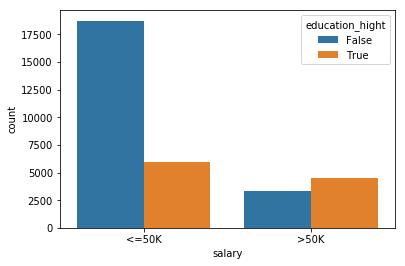

In [288]:
sns.countplot(x='salary', hue=('education_hight'), data=data);

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [165]:
column_to_show = ['age']
data[data['sex'] == 'Male'].groupby(by = ['race'])[column_to_show].describe(percentiles = [])

age                                        
                      count       mean        std   min   50%   max
race                                                               
Amer-Indian-Eskimo    192.0  37.208333  12.049563  17.0  35.0  82.0
Asian-Pac-Islander    693.0  39.073593  12.883944  18.0  37.0  90.0
Black                1569.0  37.682600  12.882612  17.0  36.0  90.0
Other                 162.0  34.654321  11.355531  17.0  32.0  77.0
White               19174.0  39.652498  13.436029  17.0  38.0  90.0

In [168]:
column_to_show = ['age']
data[data['sex'] == 'Female'].groupby(by = ['race'])[column_to_show].describe(percentiles = [])

age                                        
                     count       mean        std   min   50%   max
race                                                              
Amer-Indian-Eskimo   119.0  37.117647  13.114991  17.0  36.0  80.0
Asian-Pac-Islander   346.0  35.089595  12.300845  17.0  33.0  75.0
Black               1555.0  37.854019  12.637197  17.0  37.0  90.0
Other                109.0  31.678899  11.631599  17.0  29.0  74.0
White               8642.0  36.811618  14.329093  17.0  35.0  90.0

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age                32561 non-null int64
workclass          32561 non-null object
fnlwgt             32561 non-null int64
education          32561 non-null object
education-num      32561 non-null int64
marital-status     32561 non-null object
occupation         32561 non-null object
relationship       32561 non-null object
race               32561 non-null object
sex                32561 non-null object
capital-gain       32561 non-null int64
capital-loss       32561 non-null int64
hours-per-week     32561 non-null int64
native-country     32561 non-null object
salary             32561 non-null object
education_hight    32561 non-null int64
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [186]:
data['married/not'] = data['marital-status'].str.contains('Married').astype('object')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,education_hight,married/not
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,True


In [198]:
pd.crosstab((data['married/not']), data['salary'], margins=True)

salary,<=50K,>50K,All
married/not,,,
False,16039,1105,17144
True,8681,6736,15417
All,24720,7841,32561


In [199]:
data_male = data[data['sex'] == 'Male']

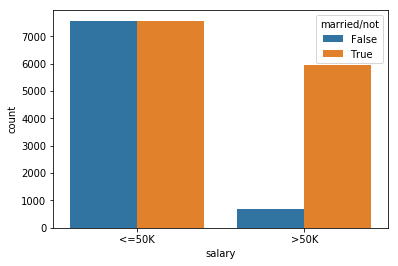

In [201]:
sns.countplot(x='salary', hue='married/not', data=data_male);

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [209]:
data['hours-per-week'].max()

99

In [217]:
data[data['hours-per-week'] == 99].count().mean()

85.0

In [224]:
x = data[(data['hours-per-week'] == 99) & (data['salary'] == '>50K')].count().mean()
y = data[data['hours-per-week'] == 99].count().mean()
x/y

0.29411764705882354

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [258]:
data.groupby(['salary', 'native-country'])['hours-per-week'].mean()

salary  native-country            
<=50K   ?                             40.164760
        Cambodia                      41.416667
        Canada                        37.914634
        China                         37.381818
        Columbia                      38.684211
        Cuba                          37.985714
        Dominican-Republic            42.338235
        Ecuador                       38.041667
        El-Salvador                   36.030928
        England                       40.483333
        France                        41.058824
        Germany                       39.139785
        Greece                        41.809524
        Guatemala                     39.360656
        Haiti                         36.325000
        Holand-Netherlands            40.000000
        Honduras                      34.333333
        Hong                          39.142857
        Hungary                       31.300000
        India                         38.233333
     